In [1]:
%matplotlib inline

In [2]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [3]:
import nltk

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [6]:
type(emma)

nltk.corpus.reader.util.StreamBackedCorpusView

In [7]:
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [8]:
emma_text = nltk.Text(emma)

In [9]:
emma_text.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [10]:
emma_text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


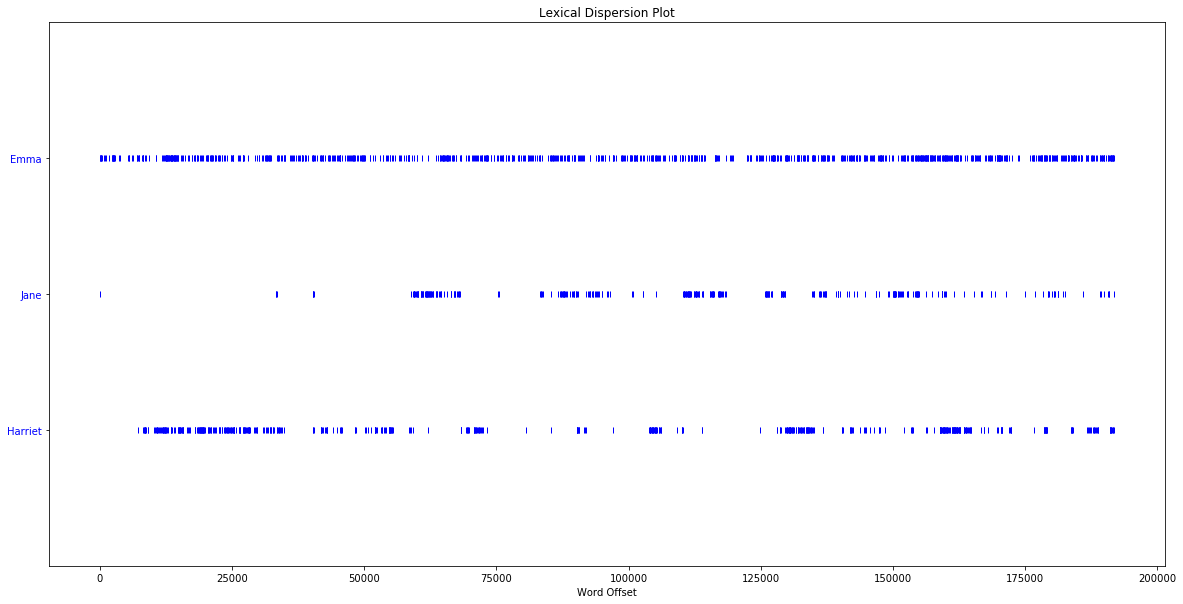

In [11]:
emma_text.dispersion_plot(["Emma", "Jane", "Harriet"])

In [12]:
from nltk.corpus import brown

In [13]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [14]:
brown.sents(categories=['science_fiction'])

[['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', 'self', 'he', 'was', 'free', 'to', 'grok', 'ever', 'closer', 'to', 'his', 'brothers', ',', 'merge', 'without', 'let', '.'], ["Self's", 'integrity', 'was', 'and', 'is', 'and', 'ever', 'had', 'been', '.'], ...]

In [15]:
words = ['what', 'when', 'who', 'why', 'where']

def list_word_frequencies(words, category):
    print("Category: {}".format(category))
    news_text = brown.words(categories=[category])
    dist = nltk.FreqDist(news_text)
    for word in words:
        print("{:10}: {:.5f}%".format(word, 100*dist[word]/len(news_text)))

In [16]:
list_word_frequencies(words, 'news')

Category: news
what      : 0.07558%
when      : 0.12729%
who       : 0.26652%
why       : 0.00895%
where     : 0.05768%


In [17]:
list_word_frequencies(words, 'government')

Category: government
what      : 0.06133%
when      : 0.07987%
who       : 0.10554%
why       : 0.00856%
where     : 0.06560%


In [18]:
cfd = nltk.ConditionalFreqDist((genre, word)
                               for genre in brown.categories()
                               for word in brown.words(categories=genre))

In [19]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [20]:
from nltk.corpus import reuters

In [21]:
fids = reuters.fileids()
print(len(fids))
print(fids[:5])

10788
['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']


In [22]:
reuters.fileids("barley")

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [23]:
from nltk.corpus import inaugural

In [24]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in ('america', 'citizen', 'war')
    if word.lower().startswith(target)
)

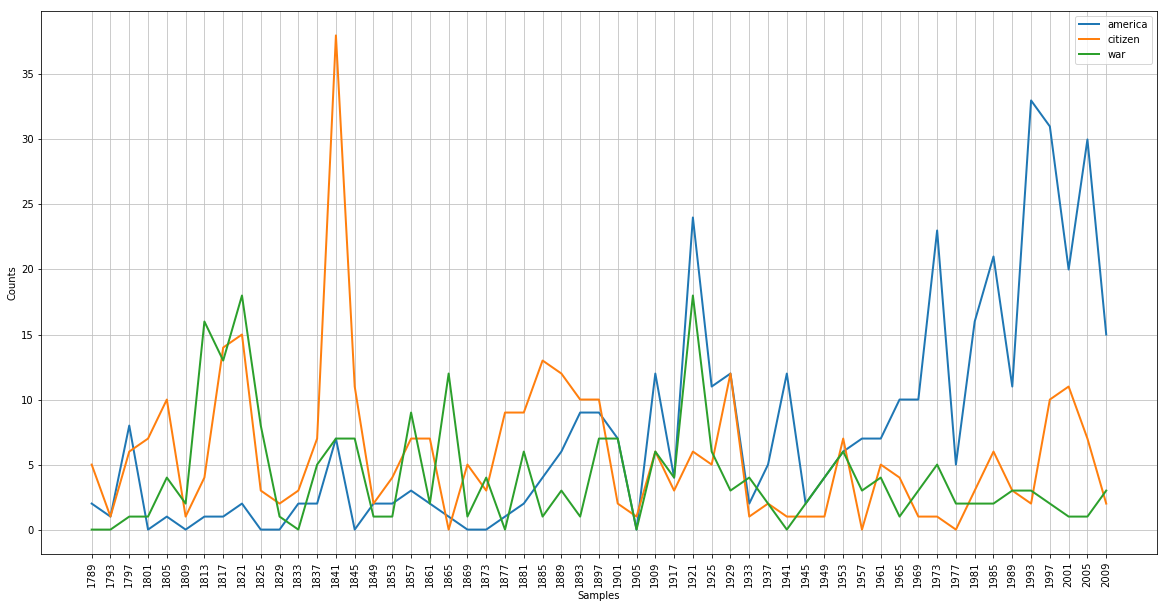

In [25]:
cfd.plot()

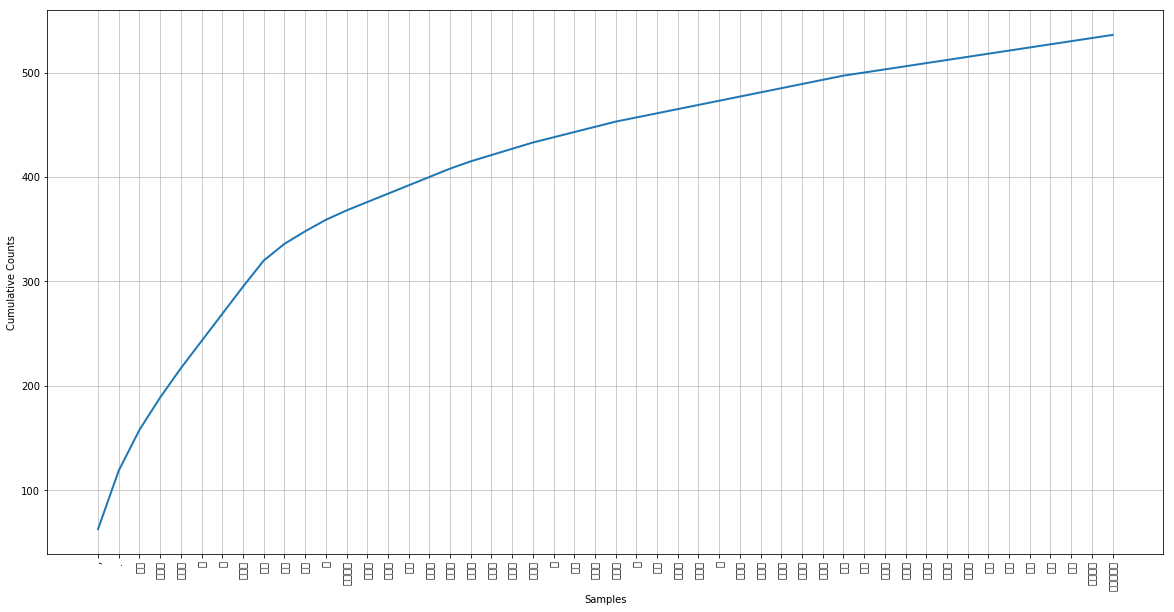

In [26]:
words = nltk.corpus.udhr.words('Korean_Hankuko-UTF8')
dist = nltk.FreqDist(words)
dist.plot(50, cumulative=True)

In [27]:
from nltk.corpus import brown

In [28]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

In [29]:
cfd.conditions()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [30]:
cfd['news']

FreqDist({'The': 806,
          'Fulton': 14,
          'County': 35,
          'Grand': 6,
          'Jury': 2,
          'said': 402,
          'Friday': 41,
          'an': 300,
          'investigation': 9,
          'of': 2849,
          "Atlanta's": 4,
          'recent': 20,
          'primary': 17,
          'election': 38,
          'produced': 6,
          '``': 732,
          'no': 109,
          'evidence': 17,
          "''": 702,
          'that': 802,
          'any': 90,
          'irregularities': 3,
          'took': 47,
          'place': 25,
          '.': 4030,
          'jury': 44,
          'further': 16,
          'in': 1893,
          'term-end': 1,
          'presentments': 1,
          'the': 5580,
          'City': 44,
          'Executive': 6,
          'Committee': 37,
          ',': 5188,
          'which': 244,
          'had': 279,
          'over-all': 2,
          'charge': 17,
          'deserves': 3,
          'praise': 2,
          'and': 2146,
   

In [35]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday']
cfd.tabulate(samples=days, conditions=['news', 'romance'])

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


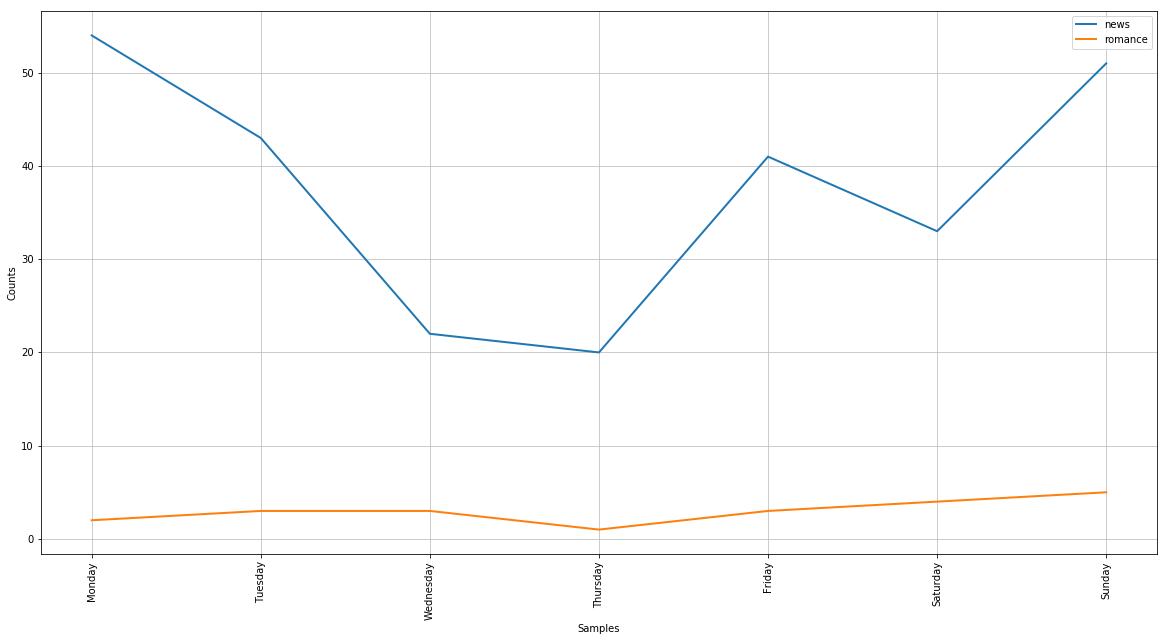

In [36]:
cfd.plot(samples=days, conditions=['news', 'romance'])

In [37]:
from nltk.book import text2

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [39]:
cfd = nltk.ConditionalFreqDist(nltk.bigrams(text2))

In [41]:
word = "handsome"
for _ in range(20):
    print(word, end=" ")
    word = cfd[word].max()

handsome , and the same time , and the same time , and the same time , and the same 

In [42]:
english_words = nltk.corpus.words.words()

In [43]:
english_words[:5]

['A', 'a', 'aa', 'aal', 'aalii']

In [44]:
puzzle_letters = nltk.FreqDist('egivrvonl')

In [46]:
puzzle_letters

FreqDist({'e': 1, 'g': 1, 'i': 1, 'l': 1, 'n': 1, 'o': 1, 'r': 1, 'v': 2})

In [47]:
obligatory = 'r'

[word for word in english_words
 if len(word) > 4 and
    obligatory in word and
    nltk.FreqDist(word) <= puzzle_letters]

['enrol',
 'ergon',
 'genro',
 'giver',
 'glore',
 'glover',
 'goner',
 'gorlin',
 'govern',
 'grein',
 'groin',
 'grove',
 'grovel',
 'ignore',
 'involver',
 'irone',
 'levir',
 'lienor',
 'liner',
 'linger',
 'liver',
 'livor',
 'livre',
 'longer',
 'lover',
 'lovering',
 'negro',
 'nigre',
 'noiler',
 'norie',
 'ogler',
 'oiler',
 'oriel',
 'overling',
 'regin',
 'region',
 'reign',
 'renvoi',
 'reoil',
 'revolving',
 'rigol',
 'ringe',
 'ringle',
 'rivel',
 'riven',
 'roving',
 'vergi',
 'vigor',
 'viner',
 'violer',
 'vireo',
 'virole',
 'viron',
 'viver']

In [48]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [49]:
female = names.words('female.txt')
male = names.words('male.txt')

In [51]:
print(', '.join(set(female) & set(male)))

Bobby, Lorne, Sunny, Jan, Jermaine, Brett, Abby, Torey, Daniel, Gabriell, Joey, Lesley, Tommy, Shawn, Eddy, Sydney, Niki, Jodie, Dani, Claude, Caryl, Gale, Nicky, Beau, Mel, Justin, Gill, Nat, Hazel, Jerry, Bryn, Blair, Jodi, Dorian, Vinnie, Jaime, Matty, Georgia, Lind, Jody, Trace, Evelyn, Bernie, Cris, Harley, Gus, Chad, Aubrey, Lou, Patty, Kerry, Lindsey, Randi, Meryl, George, Hannibal, Stacy, Ajay, Darby, Jackie, Page, Dory, Paige, Vin, Wallis, Brooke, Christie, Kip, Brooks, Jude, Luce, Holly, Francis, Ali, Shelley, Jerrie, Nikki, Courtney, Clair, Grace, Ike, Saundra, Sam, Blake, Clem, Barrie, Freddie, Sonnie, Jordan, Kit, Erin, Cass, Tobe, Sascha, Marietta, Daryl, Virgie, Angie, Tammy, Alix, Scotty, Isa, Regan, Max, Corrie, Jean, Winny, Sandy, Toby, Rory, Jere, Adrien, Addie, Pen, Maurise, Ira, Nickie, Shell, Timmie, Demetris, Deane, Tally, Allie, Cam, Ashley, Alex, Glenn, Vinny, Muffin, Martie, Morlee, Haleigh, Averil, Ginger, Tracey, Clare, Leigh, Cary, Winnie, Micky, Reggie, Sa

In [52]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)

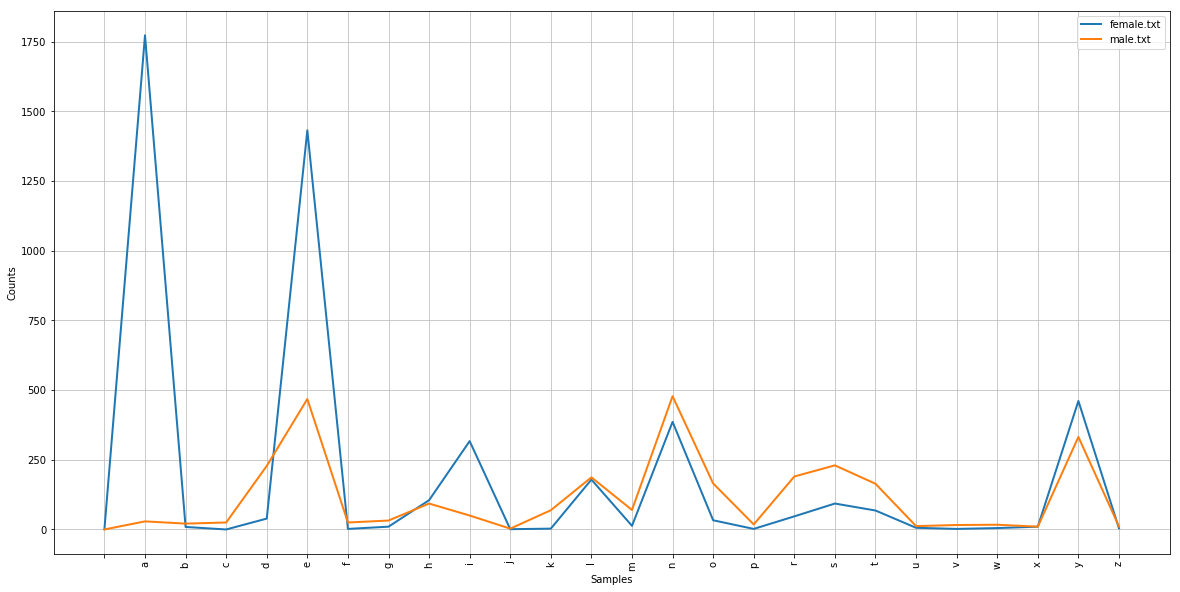

In [53]:
cfd.plot()

In [54]:
entries = nltk.corpus.cmudict.entries()

In [56]:
entries[1000:1010]

[("addidas's", ['AH0', 'D', 'IY1', 'D', 'AH0', 'S', 'IH0', 'Z']),
 ('addie', ['AE1', 'D', 'IY0']),
 ('adding', ['AE1', 'D', 'IH0', 'NG']),
 ('addington', ['AE1', 'D', 'IH0', 'NG', 'T', 'AH0', 'N']),
 ('addis', ['AA1', 'D', 'IH0', 'S']),
 ('addis-ababa', ['AA1', 'D', 'IH0', 'S', 'AH0', 'B', 'AA1', 'B', 'AH0']),
 ('addis-ababa', ['AA1', 'D', 'IY0', 'S', 'AH0', 'B', 'AA1', 'B', 'AH0']),
 ('addison', ['AE1', 'D', 'AH0', 'S', 'AH0', 'N']),
 ('addison', ['AE1', 'D', 'IH0', 'S', 'AH0', 'N']),
 ("addison's", ['AE1', 'D', 'IH0', 'S', 'AH0', 'N', 'Z'])]

In [57]:
phone_dict = dict(entries)
phone_dict['fish']

['F', 'IH1', 'SH']

In [58]:
fish_phones = _

In [59]:
word_map = nltk.ConditionalFreqDist(
    (phone, word)
    for word, phones in entries
    for phone in phones
)

In [62]:
for phone in fish_phones:
    print('{:3} : {}'.format(phone, word_map[phone].max()))

F   : february
IH1 : didn't
SH  : direction


In [69]:
blacklisted = {
    'f': ('f', 'ph'),
    'i': ('i', 'y'),
    'sh': ('sh',)
}

def is_blacklisted(word, letter):
    for b in blacklisted.get(letter, ()):
        if b in word:
            return True
    return False

for phone, letter in zip(fish_phones, ('f', 'i', 'sh')):
    words = word_map[phone]
    alternatives = []
    for word, _ in words.most_common():
        if not is_blacklisted(word, letter):
            alternatives.append(word)
        if len(alternatives) >= 10:
            break
    print("{:3} : {}".format(phone, ", ".join(alternatives)))

F   : chlebowski, cough, coughing, enough, enough's, korzeniewski, zaniewski, zhirinovsky, zhirinovsky's, zuchowski
IH1 : belvedere, casebeer, dengler, gere, reso, reso's, sears's, spengler, wengler, when
SH  : direction, directional, directionless, directions, educationally, evolution, evolutionary, internationalists, internationalization, internationally


In [70]:
from nltk.corpus import wordnet as wn

In [71]:
wn.synsets('motorcar')

[Synset('car.n.01')]

In [72]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [73]:
wn.synset('car.n.02').lemma_names()

['car', 'railcar', 'railway_car', 'railroad_car']

In [74]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [75]:
wn.synset('car.n.02').definition()

'a wheeled vehicle adapted to the rails of railroad'

In [80]:
for synset in wn.synsets('dish'):
    print(synset.definition())

a piece of dishware normally used as a container for holding or serving food
a particular item of prepared food
the quantity that a dish will hold
a very attractive or seductive looking woman
directional antenna consisting of a parabolic reflector for microwave or radio frequency radiation
an activity that you like or at which you are superior
provide (usually but not necessarily food)
make concave; shape like a dish


In [81]:
rr_car = wn.synset('car.n.02')

In [84]:
sorted(set(
    lemma.name() for synset in rr_car.hyponyms() for lemma in synset.lemmas()))

['baggage_car',
 'cabin_car',
 'caboose',
 'carriage',
 'club_car',
 'coach',
 'freight_car',
 "guard's_van",
 'handcar',
 'lounge_car',
 'luggage_van',
 'mail_car',
 'passenger_car',
 'slip_carriage',
 'slip_coach',
 'tender',
 'van']